In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2022-12-31'
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,3.800,5.000,3.508,4.778,93831500
1,5.158,6.084,4.660,4.766,85935500
2,5.000,5.184,4.054,4.392,41094000
3,4.600,4.620,3.742,3.840,25699000
4,4.000,4.000,3.166,3.222,34334500


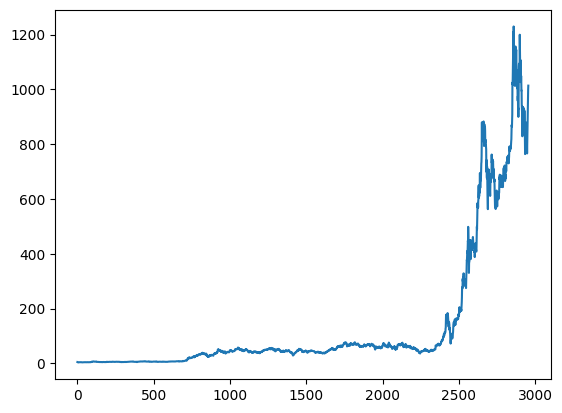

In [4]:
plt.plot(df.Close)

In [5]:
df

,Open,High,Low,Close,Volume
0,3.800000,5.000000,3.508000,4.778000,93831500
1,5.158000,6.084000,4.660000,4.766000,85935500
2,5.000000,5.184000,4.054000,4.392000,41094000
3,4.600000,4.620000,3.742000,3.840000,25699000
4,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2951,874.489990,907.849976,867.390015,905.390015,33408500
2952,914.979980,942.849976,907.090027,921.159973,27327200
2953,930.000000,997.859985,921.750000,993.979980,35289500
2954,979.940002,1040.699951,976.400024,999.109985,40225400


In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2951    988.279197
2952    987.306497
2953    986.867697
2954    986.088396
2955    985.087596
Name: Close, Length: 2956, dtype: float64

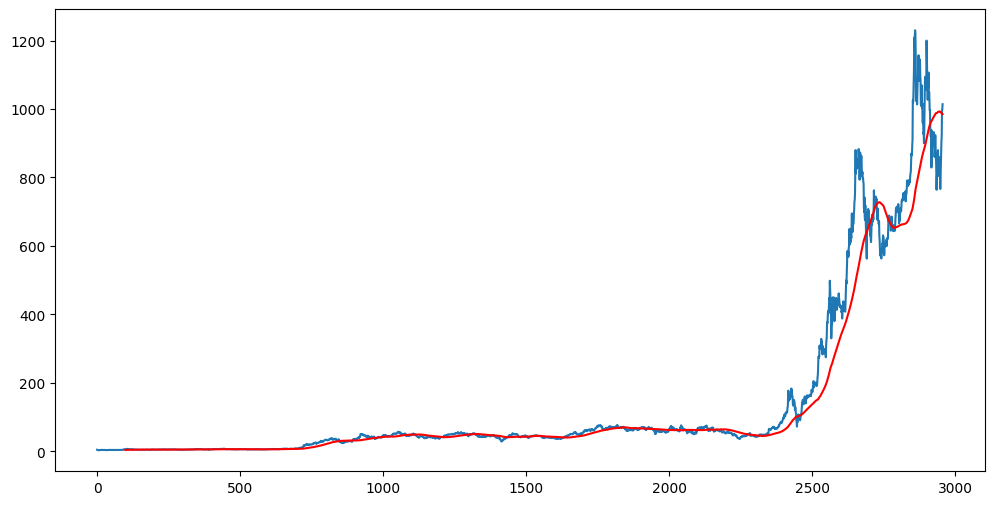

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2951    851.032347
2952    852.642897
2953    854.587147
2954    856.564747
2955    858.640447
Name: Close, Length: 2956, dtype: float64

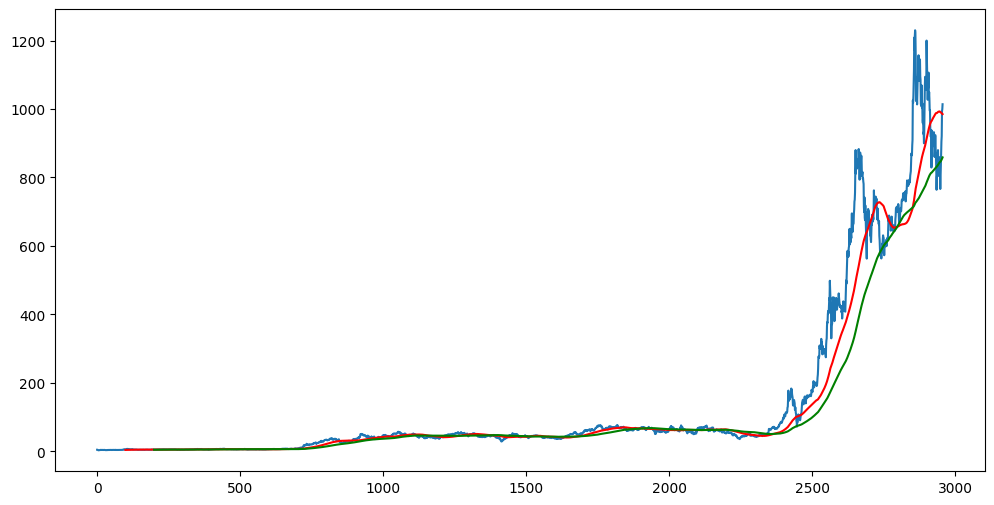

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
df.shape

(2956, 5)

In [11]:
# splitting Data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2069, 1)
(887, 1)


In [12]:
data_training.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [13]:
data_testing.head()

,Close
2069,58.967999
2070,56.992001
2071,59.804001
2072,59.666000
2073,59.820000


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.74414954],
       [0.74122424],
       [0.75677141]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i: 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# ML Model

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [39]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
62/62 [==============================] - 14s 171ms/step - loss: nan
Epoch 2/50
62/62 [==============================] - 11s 174ms/step - loss: nan
Epoch 3/50
62/62 [==============================] - 11s 174ms/step - loss: nan
Epoch 4/50
62/62 [==============================] - 11s 174ms/step - loss: nan
Epoch 5/50
62/62 [==============================] - 11s 171ms/step - loss: nan
Epoch 6/50
62/62 [==============================] - 11s 171ms/step - loss: nan
Epoch 7/50
62/62 [==============================] - 11s 171ms/step - loss: nan
Epoch 8/50
62/62 [==============================] - 11s 171ms/step - loss: nan
Epoch 9/50
62/62 [==============================] - 11s 171ms/step - loss: nan
Epoch 10/50
62/62 [==============================] - 11s 172ms/step - loss: nan
Epoch 11/50
62/62 [==============================] - 11s 171ms/step - loss: nan
Epoch 12/50
62/62 [==============================] - 11s 171ms/step - loss: nan
Epoch 13/50
62/62 [==============================

In [63]:
model.save('keras_model.h5')

In [64]:
data_testing.head()

,Close
2069,58.967999
2070,56.992001
2071,59.804001
2072,59.666000
2073,59.820000


In [65]:
data_training.tail(100)

,Close
1969,56.138000
1970,57.096001
1971,58.816002
1972,58.779999
1973,59.984001
...,...
2064,57.099998
2065,55.888000
2066,58.108002
2067,57.891998


In [66]:
past_100_days = data_training.tail(100)

In [67]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [68]:
final_df.head()

,Close
0,56.138000
1,57.096001
2,58.816002
3,58.779999
4,59.984001


In [69]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01703687],
       [0.01783914],
       [0.01927954],
       [0.01924939],
       [0.02025766],
       [0.02046367],
       [0.01766662],
       [0.01928121],
       [0.02073501],
       [0.02060101],
       [0.02141835],
       [0.02111185],
       [0.0204486 ],
       [0.01892614],
       [0.0176214 ],
       [0.01800663],
       [0.0176817 ],
       [0.01638869],
       [0.01767332],
       [0.01608554],
       [0.01676554],
       [0.01656121],
       [0.01672869],
       [0.01755106],
       [0.01888426],
       [0.01771352],
       [0.01890101],
       [0.01972505],
       [0.01878545],
       [0.02353708],
       [0.02296594],
       [0.0232289 ],
       [0.02564742],
       [0.02743452],
       [0.02777117],
       [0.02993846],
       [0.03001384],
       [0.03213423],
       [0.02907255],
       [0.03069216],
       [0.02822841],
       [0.02590368],
       [0.02579984],
       [0.02730556],
       [0.02772428],
       [0.02863373],
       [0.02746467],
       [0.026

In [70]:
input_data.shape

(987, 1)

In [71]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [72]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(887, 100, 1)
(887,)


In [73]:
# Making Predictions

y_predicted = model.predict(x_test)

28/28 [==============================] - 1s 34ms/step


In [74]:
y_predicted.shape

(887, 1)

In [75]:
y_test

array([0.01940682, 0.01775205, 0.02010693, 0.01999136, 0.02012032,
       0.02021747, 0.02043688, 0.0218756 , 0.02153057, 0.01437046,
       0.02206318, 0.0204419 , 0.01940012, 0.01722781, 0.01389815,
       0.01199046, 0.01404051, 0.01304898, 0.01227016, 0.01336721,
       0.01350288, 0.01635017, 0.01554455, 0.01422642, 0.01357155,
       0.01373066, 0.01928958, 0.01834495, 0.02275993, 0.02544644,
       0.02610802, 0.02527895, 0.02652171, 0.02768743, 0.02804417,
       0.02720506, 0.02714811, 0.02833728, 0.02887994, 0.02873087,
       0.02551008, 0.02675787, 0.02764053, 0.02838418, 0.02936733,
       0.02922664, 0.02822506, 0.02666743, 0.02459728, 0.0279755 ,
       0.02762713, 0.02828871, 0.02716654, 0.02872585, 0.03006743,
       0.03027009, 0.03083285, 0.02998034, 0.0311829 , 0.03145255,
       0.03142576, 0.03313246, 0.03127669, 0.02838083, 0.02647314,
       0.02579314, 0.02284703, 0.0235823 , 0.01949894, 0.02464082,
       0.02297264, 0.02594388, 0.02576466, 0.02196604, 0.02033

In [76]:
y_predicted

array([[-1.57415954e-04],
       [-1.55057714e-04],
       [-1.52748442e-04],
       [-1.50527223e-04],
       [-1.48452789e-04],
       [-1.46509075e-04],
       [-1.44702237e-04],
       [-1.43042460e-04],
       [-1.41542303e-04],
       [-1.40209493e-04],
       [-1.38968986e-04],
       [-1.37852825e-04],
       [-1.36888368e-04],
       [-1.36077608e-04],
       [-1.35384631e-04],
       [-1.34762842e-04],
       [-1.34117581e-04],
       [-1.33379071e-04],
       [-1.32506233e-04],
       [-1.31448673e-04],
       [-1.30165776e-04],
       [-1.28679036e-04],
       [-1.27092615e-04],
       [-1.25477556e-04],
       [-1.23854174e-04],
       [-1.22212237e-04],
       [-1.20549092e-04],
       [-1.18963973e-04],
       [-1.17537842e-04],
       [-1.16318952e-04],
       [-1.15312549e-04],
       [-1.14548660e-04],
       [-1.14063747e-04],
       [-1.13914801e-04],
       [-1.14204508e-04],
       [-1.15021110e-04],
       [-1.16355543e-04],
       [-1.18207696e-04],
       [-1.2

In [77]:
scaler.scale_

array([0.00083744])

In [78]:
scale_factor = 1/0.00083744
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

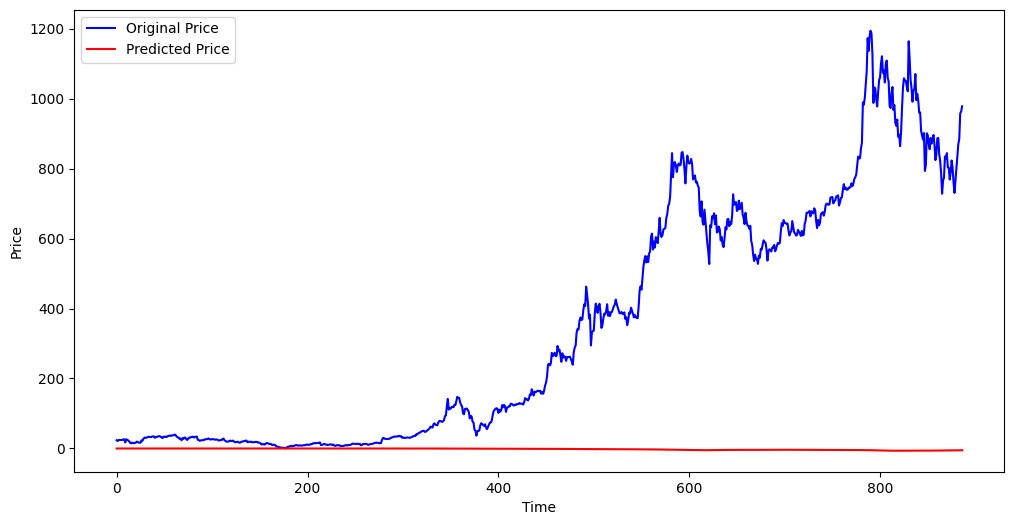

In [79]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()